In [226]:
import pandas as pd
import numpy as np

In [227]:
file1= pd.read_csv('marketing_customer_analysis.csv')
file1.shape


(10910, 26)

In [228]:
col=[]
for i in file1.columns:
    col.append(i.lower())
file1.columns=col

In [229]:
file1.head()

,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [ ]:
file1=file1.drop(['unnamed: 0'],axis=1) 
#this column is the same as the index, so i think i can directly delete it

In [231]:
file1.head()


,0,1,2,3,4,5,6,7,8,9,...,10900,10901,10902,10903,10904,10905,10906,10907,10908,10909
customer,DK49336,KX64629,LZ68649,XL78013,QA50777,HO81102,IW72280,IH64929,FM55990,QX31376,...,VN73653,RY92254,PP30874,SU71163,QI63521,FE99816,KX53892,TL39050,WA60547,IV32877
state,Arizona,California,Washington,Oregon,Oregon,NaN,California,California,California,Oregon,...,Oregon,Washington,California,Arizona,Nevada,Nevada,Oregon,Arizona,California,NaN
customer lifetime value,4809.21696,2228.525238,14947.9173,22332.43946,9025.067525,4745.181764,5035.035257,4956.247235,5989.773931,17114.32815,...,6423.739052,4547.892543,3579.023825,2771.663013,19228.46362,15563.36944,5259.444853,23893.3041,11971.97765,6857.519928
response,No,No,No,Yes,No,NaN,No,No,Yes,No,...,No,No,No,No,No,No,No,No,No,NaN
coverage,Basic,Basic,Basic,Extended,Premium,Basic,Basic,Basic,Premium,Extended,...,Basic,Premium,Extended,Basic,Basic,Premium,Basic,Extended,Premium,Basic
education,College,College,Bachelor,College,Bachelor,High School or Below,Doctor,High School or Below,College,Master,...,College,Bachelor,High School or Below,College,High School or Below,Bachelor,College,Bachelor,College,Bachelor
effective to date,2/18/11,1/18/11,2/10/11,1/11/11,1/17/11,2/14/11,2/14/11,2/24/11,1/19/11,1/4/11,...,2/13/11,1/13/11,1/24/11,1/7/11,2/24/11,1/19/11,1/6/11,2/6/11,2/13/11,1/8/11
employmentstatus,Employed,Unemployed,Employed,Employed,Medical Leave,Employed,Employed,Employed,Employed,Employed,...,Unemployed,Employed,Employed,Employed,Unemployed,Unemployed,Employed,Employed,Employed,Unemployed
gender,M,F,M,M,F,M,F,M,M,F,...,M,M,F,M,M,F,F,F,F,M
income,48029,0,22139,49078,23675,50549,37405,87197,66839,70961,...,0,33531,28304,59855,0,0,61146,39837,64195,0


In [232]:
file1.dtypes

customer                          object
state                             object
customer lifetime value          float64
response                          object
coverage                          object
education                         object
effective to date                 object
employmentstatus                  object
gender                            object
income                             int64
location code                     object
marital status                    object
monthly premium auto               int64
months since last claim          float64
months since policy inception      int64
number of open complaints        float64
number of policies                 int64
policy type                       object
policy                            object
renew offer type                  object
sales channel                     object
total claim amount               float64
vehicle class                     object
vehicle size                      object
vehicle type    

In [233]:
#coustomer lifetime value, income, monthly premium auto, monthly since last claim, months since policy inception, number of open complaints, number of policies and total claim amount are numerical. The rest are categorical


In [234]:
file1.isna().sum()

customer                            0
state                             631
customer lifetime value             0
response                          631
coverage                            0
education                           0
effective to date                   0
employmentstatus                    0
gender                              0
income                              0
location code                       0
marital status                      0
monthly premium auto                0
months since last claim           633
months since policy inception       0
number of open complaints         633
number of policies                  0
policy type                         0
policy                              0
renew offer type                    0
sales channel                       0
total claim amount                  0
vehicle class                     622
vehicle size                      622
vehicle type                     5482
dtype: int64

In [235]:
file1=file1.drop(['vehicle type'],axis=1) 
# Actually i don't know how to deal with this column. It has a large amount of NaN values. 
#It seems to be not proper to delete it but i can't find a good way to clear the NaN.

In [236]:
file1['months since last claim'] =  pd.to_numeric(file1['months since last claim'], errors='coerce')
file1['number of open complaints'] =  pd.to_numeric(file1['number of open complaints'], errors='coerce')
file1 = file1.drop_duplicates()
file1 = file1.reset_index(drop=True)
file1.shape

(10854, 24)

In [237]:
mean_1=file1['months since last claim'].mean()
mean_2=file1['number of open complaints'].mean()
file1['months since last claim']=file1['months since last claim'].fillna(mean_1)
file1['number of open complaints']=file1['number of open complaints'].fillna(mean_2)


In [238]:
file1.isna().sum()

customer                           0
state                            612
customer lifetime value            0
response                         612
coverage                           0
education                          0
effective to date                  0
employmentstatus                   0
gender                             0
income                             0
location code                      0
marital status                     0
monthly premium auto               0
months since last claim            0
months since policy inception      0
number of open complaints          0
number of policies                 0
policy type                        0
policy                             0
renew offer type                   0
sales channel                      0
total claim amount                 0
vehicle class                    595
vehicle size                     595
dtype: int64

In [239]:
file1['state'].value_counts(dropna=False)
file1['response'].value_counts(dropna=False)
file1['vehicle class'].value_counts(dropna=False)
file1['vehicle size'].value_counts(dropna=False)

Medsize    7229
Small      1962
Large      1068
NaN         595
Name: vehicle size, dtype: int64

In [240]:
file1['state']=file1['state'].fillna('California')
file1['response']=file1['response'].fillna('No')
file1['vehicle class']=file1['vehicle class'].fillna('Four-Door Car')
file1['vehicle size']=file1['vehicle size'].fillna('Medsize')

In [241]:
file1.isna().sum()

customer                         0
state                            0
customer lifetime value          0
response                         0
coverage                         0
education                        0
effective to date                0
employmentstatus                 0
gender                           0
income                           0
location code                    0
marital status                   0
monthly premium auto             0
months since last claim          0
months since policy inception    0
number of open complaints        0
number of policies               0
policy type                      0
policy                           0
renew offer type                 0
sales channel                    0
total claim amount               0
vehicle class                    0
vehicle size                     0
dtype: int64

In [242]:
file1['month']=file1['effective to date'].str.split('/',expand=True)[0]#this is the method i use, but it seems not so formal as the method below
file1.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.000000,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.000000,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.000000,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.000000,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,0.383939,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,1


In [243]:
file1['effective to date']=pd.to_datetime(file1['effective to date'],errors='coerce')#The classmate shares this method on slack
file1['month1'] = pd.DatetimeIndex(file1['effective to date']).month
file1.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,month,month1
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,1,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,1,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,1,1


In [244]:
data=file1[file1['month'].isin(['1','2','3'])]
data.shape

(10854, 26)

# Round 3

In [245]:
file1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10854 entries, 0 to 10853
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       10854 non-null  object        
 1   state                          10854 non-null  object        
 2   customer lifetime value        10854 non-null  float64       
 3   response                       10854 non-null  object        
 4   coverage                       10854 non-null  object        
 5   education                      10854 non-null  object        
 6   effective to date              10854 non-null  datetime64[ns]
 7   employmentstatus               10854 non-null  object        
 8   gender                         10854 non-null  object        
 9   income                         10854 non-null  int64         
 10  location code                  10854 non-null  object        
 11  marital status 

In [246]:
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
%matplotlib inline

In [247]:
file1.describe()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month1
count,10854.000000,10854.000000,10854.000000,10854.000000,10854.000000,10854.000000,10854.000000,10854.000000,10854.000000
mean,8012.835553,37544.419385,93.212088,15.143806,48.101529,0.383939,2.976875,434.851263,1.466925
std,6879.620144,30363.686322,34.450728,9.788910,27.927811,0.885353,2.397886,292.005444,0.498928
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,4014.453113,0.000000,68.000000,7.000000,24.000000,0.000000,1.000000,271.082527,1.000000
50%,5764.823237,33813.500000,83.000000,15.000000,48.000000,0.000000,2.000000,383.403043,1.000000
75%,8992.779137,62275.500000,109.000000,23.000000,71.000000,0.383939,4.000000,547.200000,2.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


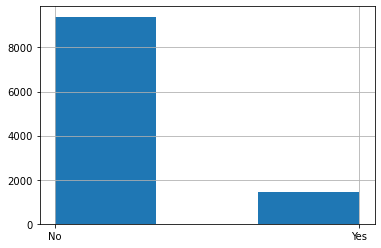

In [248]:
file1['response'].hist(bins=3)
plt.show()

In [249]:
file1['response'].value_counts()

No     9394
Yes    1460
Name: response, dtype: int64

In [250]:
data['response']=file1['response'].apply(lambda x: 1 if str(x)=='Yes' else 0)
data['response'].value_counts()
#Is there any way that i can directly create a plot with two categorical objects?

0    9394
1    1460
Name: response, dtype: int64

<AxesSubplot:xlabel='sales channel', ylabel='response'>

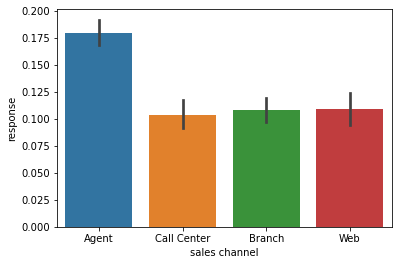

In [251]:
sns.barplot(x=file1["sales channel"], y=data['response'])


<AxesSubplot:xlabel='total claim amount', ylabel='Percent'>

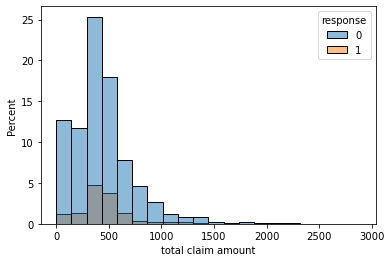

In [269]:
sns.histplot(x=file1['total claim amount'], hue=data['response'],bins=20,stat='percent')
#This histogram seems to be weird. I am not sure it is right or not.

<AxesSubplot:xlabel='income', ylabel='Percent'>

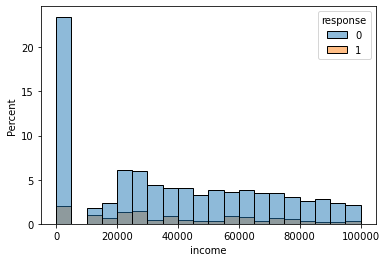

In [270]:
sns.histplot(x=file1['income'], hue=data['response'],bins=20,stat='percent')